In [1]:
import numpy as np
from scipy.io import loadmat
from matplotlib import pyplot as plt

%matplotlib inline

## Loading the Data

In [2]:
data = loadmat('mnist_all.mat')

In [3]:
type(data)

dict

In [4]:
data.keys()

dict_keys(['__header__', '__version__', '__globals__', 'train0', 'test0', 'train1', 'test1', 'train2', 'test2', 'train3', 'test3', 'train4', 'test4', 'train5', 'test5', 'train6', 'test6', 'train7', 'test7', 'train8', 'test8', 'train9', 'test9'])

## Visualize some Data

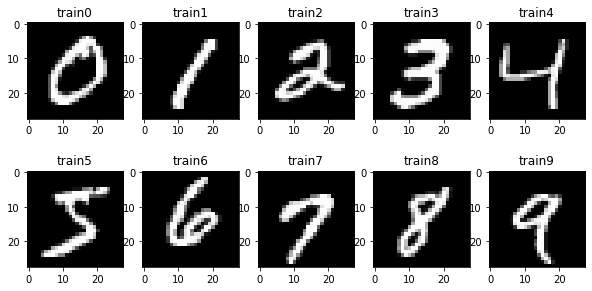

In [49]:
fig, ((ax0,ax1,ax2,ax3,ax4),(ax5,ax6,ax7,ax8,ax9)) = plt.subplots(nrows=2,ncols=5,figsize=(10,5))

ax0.imshow(data['train0'][0].reshape((28,28)), cmap='gray')
ax0.set_title("train0")
ax1.imshow(data['train1'][0].reshape((28,28)), cmap='gray')
ax1.set_title("train1")
ax2.imshow(data['train2'][0].reshape((28,28)), cmap='gray')
ax2.set_title("train2")
ax3.imshow(data['train3'][0].reshape((28,28)), cmap='gray')
ax3.set_title("train3")
ax4.imshow(data['train4'][0].reshape((28,28)), cmap='gray')
ax4.set_title("train4")
ax5.imshow(data['train5'][0].reshape((28,28)), cmap='gray')
ax5.set_title("train5")
ax6.imshow(data['train6'][0].reshape((28,28)), cmap='gray')
ax6.set_title("train6")
ax7.imshow(data['train7'][0].reshape((28,28)), cmap='gray')
ax7.set_title("train7")
ax8.imshow(data['train8'][0].reshape((28,28)), cmap='gray')
ax8.set_title("train8")
ax9.imshow(data['train9'][0].reshape((28,28)), cmap='gray')
ax9.set_title("train9")

plt.show()

## Building the Model

### Sigmoid Function

In [6]:
def sigmoid(z):
    
    return 1/(1+np.exp(-z))

#### Test

In [7]:
sigmoid(0)

0.5

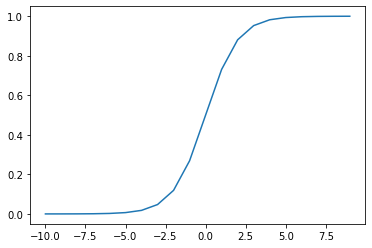

In [8]:
sig = []
for i in range(-10,10):
    
    sig.append(sigmoid(i))

plt.plot(range(-10,10), sig)

### Cost Function

In [9]:
def cost_function(w,X,y):
    
    N = X.shape[0]
    h = sigmoid(X.dot(w))
    
    cost = (1/N) * (np.sum( np.log( (np.power(h,y)) * (np.power((1-h),(1-y)) ))))
    
    return cost

### Gradient Ascent

In [10]:
def gradient_ascent(w,X,y,epsilon,iterations):
    
    N = X.shape[0]
    cost_history = []
    
    for i in range(iterations):
        
        h = sigmoid(X.dot(w))
        w1 = (epsilon/N)
        w2 = np.transpose(X).dot((y-h))
        
        w += w1*w2
        cost_history.append(cost_function(w,X,y))
    
    return w, cost_history

## Train the Model

### Data Parsing

In [11]:
X1 = data['train1']
X2 = data['train2']

y1 = np.zeros(X1.shape[0])
y2 = np.ones(X2.shape[0])

X = np.concatenate((X1,X2))
y = np.concatenate((y1,y2))

### Determine Hyper-Parameters

In [12]:
epsilon = 0.00001
initial_weight = np.zeros(X.shape[1])
iterations = 100

### Train

In [13]:
w, cost_history = gradient_ascent(initial_weight,X,y,epsilon,iterations)

### Visualize cost_history

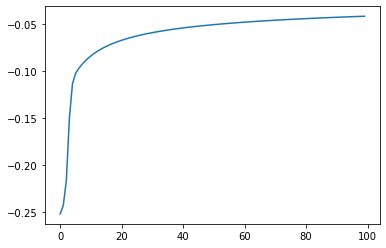

In [14]:
plt.plot(range(iterations), cost_history)

## Test the Model

In [15]:
test1, test2 = data['test1'],data['test2']

#### Test 1's recognition

In [16]:
mistakes_1 = np.sum(sigmoid(test1.dot(w)) >= 0.5)

#### Test 2's recognition

In [17]:
mistakes_2 = np.sum(sigmoid(test2.dot(w)) <= 0.5)

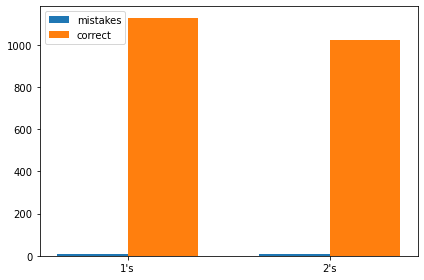

In [56]:

labels = ["1's", "2's"]
mistakes = [mistakes_1, mistakes_2]
correct = [test1.shape[0]-mistakes_1, test2.shape[0]-mistakes_2]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, mistakes, width, label='mistakes')
rects2 = ax.bar(x + width/2, correct, width, label='correct')

ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

fig.tight_layout()

plt.show()

#### Success Rate

In [28]:
print(f"Test 1 - Success Rate:")
print(f"{(test1.shape[0]-mistakes_1)/test1.shape[0]*100}")

Test 1 - Success Rate:
99.29515418502203


In [29]:
print(f"Test 2 - Success Rate:")
print(f"{(test2.shape[0]-mistakes_2)/test2.shape[0]*100}")

Test 2 - Success Rate:
99.2248062015504
